### Import modules

In [1]:
# Standard imports
import pandas as pd
import sys 
import os
import seaborn as sns
import os
import shutil

# Local imports
import analysis_functions

# Apply better style
analysis_functions.apply_heatmap_style()


### Plot tune scan

In [2]:
# Define study
STUDY_NAME = "tune_scan_start_of_collapse_flat_pos_oct"
COLLIDER = "base_collider"
PARQUET_PATH = f"../scans/{STUDY_NAME}/da.parquet"
CONF_MAD_PATH = f"../scans/{STUDY_NAME}/{COLLIDER}/config.yaml"
CONF_COLLIDER_PATH = f"../scans/{STUDY_NAME}/{COLLIDER}/xtrack_0016/config.yaml"

# Load dataframe
df = pd.read_parquet(f"../scans/{STUDY_NAME}/da.parquet")

# Round all numbers to 3 decimals
df = df.round(3)

# Keep only relevant collider
df = df.reset_index(level=1)
df = df[df["name base collider"] == COLLIDER]

df


name base collider  normalized amplitude in xy-plane  \
beam  qx     qy                                                            
lhcb1 62.305 60.323      base_collider                             7.969   
             60.325      base_collider                             7.406   
             60.326      base_collider                             6.594   
             60.327      base_collider                             5.375   
             60.328      base_collider                             5.219   
...                                ...                               ...   
      62.323 60.328      base_collider                             5.219   
             60.329      base_collider                             4.000   
      62.324 60.328      base_collider                             4.688   
             60.329      base_collider                             4.281   
      62.325 60.329      base_collider                             4.000   

                         qx      qy   dqx   dqy  i_bunch_b1  i_bunch_b2  \
beam  qx     qy                                                           
lhcb1 62.305 60.323  62.305  60.323  15.0  15.0       150.0       147.0   
             60.325  62.305  60.325  15.0  15.0       150.0       147.0   
             60.326  62.305  60.326  15.0  15.0       150.0       147.0   
             60.327  62.305  60.327  15.0  15.0       150.0       147.0   
             60.328  62.305  60.328  15.0  15.0       150.0       147.0   
...                     ...     ...   ...   ...         ...         ...   
      62.323 60.328  62.323  60.328  15.0  15.0       150.0       147.0   
             60.329  62.323  60.329  15.0  15.0       150.0       147.0   
      62.324 60.328  62.324  60.328  15.0  15.0       150.0       147.0   
             60.329  62.324  60.329  15.0  15.0       150.0       147.0   
      62.325 60.329  62.325  60.329  15.0  15.0       150.0       147.0   

                     i_oct_b1  i_oct_b2  num_particles_per_bunch  \
beam  qx     qy                                                    
lhcb1 62.305 60.323     300.0     300.0             2.200000e+11   
             60.325     300.0     300.0             2.200000e+11   
             60.326     300.0     300.0             2.200000e+11   
             60.327     300.0     300.0             2.200000e+11   
             60.328     300.0     300.0             2.200000e+11   
...                       ...       ...                      ...   
      62.323 60.328     300.0     300.0             2.200000e+11   
             60.329     300.0     300.0             2.200000e+11   
      62.324 60.328     300.0     300.0             2.200000e+11   
             60.329     300.0     300.0             2.200000e+11   
      62.325 60.329     300.0     300.0             2.200000e+11   

                     crossing_angle  
beam  qx     qy                      
lhcb1 62.305 60.323           250.0  
             60.325           250.0  
             60.326           250.0  
             60.327           250.0  
             60.328           250.0  
...                             ...  
      62.323 60.328           250.0  
             60.329           250.0  
      62.324 60.328           250.0  
             60.329           250.0  
      62.325 60.329           250.0  

[106 rows x 12 columns]

In [3]:
# Reshape for plotting
df_to_plot = df.pivot(index="qy", columns="qx", values="normalized amplitude in xy-plane")
df_to_plot

qx,62.305,62.306,62.307,62.308,62.309,62.310,62.311,62.312,62.313,62.314,...,62.316,62.317,62.318,62.319,62.320,62.321,62.322,62.323,62.324,62.325
qy,,,,,,,,,,,,,,,,,,,,,
60.323,7.969,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60.324,NaN,NaN,NaN,7.938,NaN,NaN,NaN,7.906,7.875,7.844,...,7.656,7.781,7.656,7.438,7.625,NaN,NaN,NaN,NaN,NaN
60.325,7.406,7.594,7.500,7.562,7.531,7.312,7.594,7.406,7.469,7.500,...,7.469,7.219,6.906,7.062,6.812,6.781,NaN,NaN,NaN,NaN
60.326,6.594,6.781,6.719,6.875,6.875,6.562,6.781,6.688,6.844,6.781,...,6.875,6.562,6.812,6.469,6.438,6.594,6.062,NaN,NaN,NaN
60.327,5.375,6.062,5.875,6.062,5.969,6.031,6.094,5.844,6.125,5.938,...,6.062,6.094,6.062,5.844,6.094,6.094,5.844,5.250,NaN,NaN
60.328,5.219,5.188,5.375,5.188,5.156,5.312,5.281,5.281,5.312,5.156,...,5.312,5.219,5.312,5.281,5.312,5.281,5.344,5.219,4.688,NaN
60.329,6.281,5.469,6.875,6.375,6.469,5.719,6.531,5.344,6.281,5.250,...,4.656,4.531,5.000,5.031,4.438,4.719,4.469,4.000,4.281,4.0


In [4]:
import numpy as np
array_qx = np.round(np.arange(62.305, 62.330, 0.001), decimals=4)
array_qy = np.round(np.arange(60.305, 60.330, 0.001), decimals=4)

# Replace NaNs above the upper diagonal with 8
for qx in array_qx:
    for qy in array_qy:
        if qy >= qx - 2 + 0.004:
            if qx in df_to_plot.columns and qy in df_to_plot.index:
                if pd.isna(df_to_plot.loc[qy, qx]):
                    df_to_plot.loc[qy, qx] = 8
            else:
                df_to_plot.loc[qy, qx] = 8
                
# Sort indices by increasing qy
df_to_plot = df_to_plot.sort_index(ascending=True)

# Sort columns by increasing qx
df_to_plot = df_to_plot.sort_index(axis=1, ascending=True)

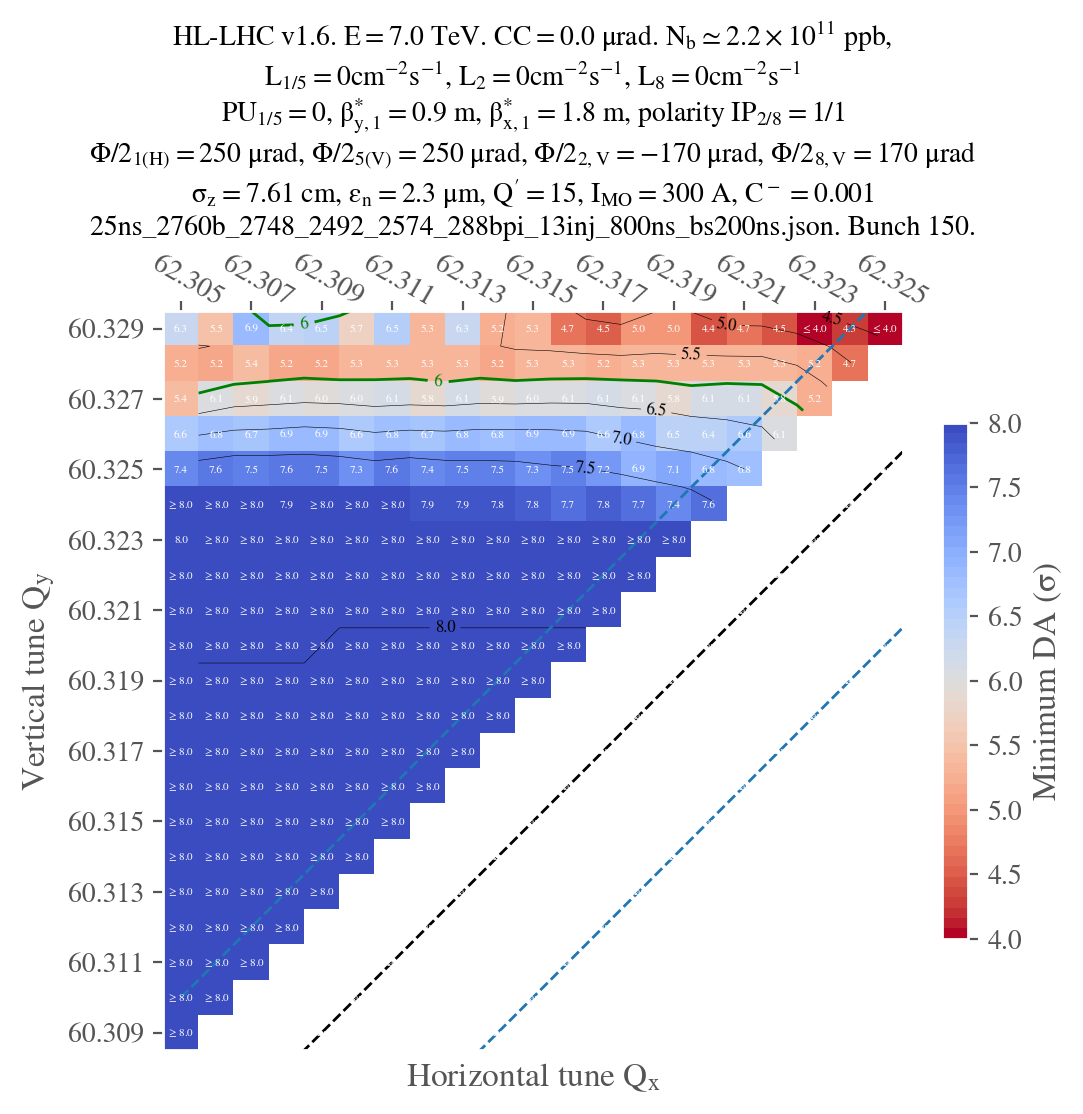

In [5]:
# Load configuration files
conf_mad = analysis_functions.load_config(CONF_MAD_PATH)['config_mad']
conf_collider = analysis_functions.load_config(CONF_COLLIDER_PATH)["config_collider"]
analysis_functions.plot_heatmap(
    df_to_plot,
    f'{STUDY_NAME}_{COLLIDER}',
    link=None,
    plot_contours=True,
    conf_mad=conf_mad,
    conf_collider=conf_collider,
    type_crossing="flatvh",
    betx=0.9,
    bety=1.8,
    Nb=True,
    green_contour=6.,
    extended_diagonal=False,
    vmin=4.,
    vmax=8.0,
    CC = True,
)
# ! Verified